# Replicando resultados de Perron 1989

*Material del curso EC4301 Macroeconometría*

Universidad de Costa Rica

**Profesor:  Randall Romero Aguilar**

Actualizado: 2021-Jun-09

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plt.style.use('seaborn-talk')
plt.rc('savefig', bbox='tight')
figpath ='../figures/'

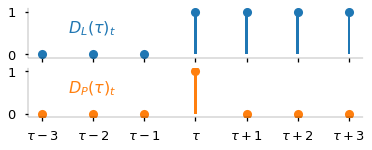

In [2]:
T = 7
data3 = pd.DataFrame(index=np.arange(T))
data3['DL'] = (data3.index>=3).astype(int)
data3['DP'] = (data3.index==3).astype(int)

fig, axs = plt.subplots(2,1,figsize=[6,2], sharex=True)
data3.plot.bar(subplots=True, width=0.05, ax=axs, legend=False)
data3.plot(subplots=True, ls='', marker='o', ax=axs, legend=False)
for ax in axs:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.25)
    ax.spines['left'].set_linewidth(0.25)
    ax.set(yticks=[0,1], ylim=[-0.08, 1.08], title='')

axs[1].set_xticks(np.arange(T))
axs[1].set_xticklabels([f'$\\tau {tau:+d}$' if tau else '$\\tau$' for tau in range(-3,4)])
axs[0].annotate('$D_L(\\tau)_t$', [0.5, 0.5], size=16, color=axs[0].lines[0].get_color())
axs[1].annotate('$D_P(\\tau)_t$', [0.5, 0.5], size=16, color=axs[1].lines[0].get_color())
fig.savefig(figpath+'perron-breaks.pdf')

## 

In [3]:
perronModelA = pd.DataFrame({
    '1%':[-4.30, -4.39, -4.39, -4.34, -4.32, -4.45, -4.42, -4.33, -4.27],
    '2.5%':[-3.93, -4.08, -4.03, -4.01, -4.01, -4.09, -4.07, -3.99, -3.97],
    '5%': [-3.68, -3.77, -3.76, -3.72, -3.76, -3.76, -3.80, -3.75, -3.69],
    '10%':[-3.40, -3.47, -3.46, -3.44, -3.46, -3.47, -3.51, -3.46, -3.38],
    '90%':[-1.38, -1.45, -1.43, -1.26, -1.17, -1.28, -1.42, -1.46, -1.37],
    '95%':[-1.09, -1.14, -1.13, -0.88, -0.79, -0.92, -1.10, -1.13, -1.04],
    '97.5%':[-0.78, -0.90, -0.83, -0.55, -0.49, -0.60, -0.82, -0.89, -0.74],
    '99%':[-0.46, -0.54, -0.51, -0.21, -0.15, -0.26, -0.50, -0.57, -0.47]},
    index = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [4]:
perronModelB = pd.DataFrame({
    '1%':[ -4.27, -4.41, -4.51, -4.55, -4.56, -4.57, -4.51, -4.38, -4.26],
    '2.5%':[ -3.94, -4.08, -4.17, -4.20, -4.26, -4.20, -4.13, -4.07, -3.96],
    '5%':[ -3.65, -3.80, -3.87, -3.94, -3.96, -3.95, -3.85, -3.82, -3.68],
    '10%':[ -3.36, -3.49, -3.58, -3.66, -3.68, -3.66, -3.57, -3.50, -3.35],
    '90%':[ -1.35, -1.48, -1.59, -1.69, -1.74, -1.71, -1.61, -1.49, -1.34],
    '95%':[ -1.04, -1.18, -1.27, -1.37, -1.40, -1.36, -1.28, -1.16, -1.04],
    '97.5%':[ -0.78, -0.87, -0.97, -1.11, -1.18, -1.11, -0.97, -0.87, -0.77],
    '99%':[ -0.40, -0.52, -0.69, -0.75, -0.82, -0.78, -0.67, -0.54, -0.43]},
    index = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [5]:
perronModelC = pd.DataFrame({
    '1%':[-4.38, -4.65, -4.78, -4.81, -4.90, -4.88, -4.75, -4.70, -4.41],
    '2.5%':[-4.01, -4.32, -4.46, -4.48, -4.53, -4.49, -4.44, -4.31, -4.10],
    '5%':[-3.75, -3.99, -4.17, -4.22, -4.24, -4.24, -4.18, -4.04, -3.80],
    '10%':[-3.45, -3.66, -3.87, -3.95, -3.96, -3.95, -3.86, -3.69, -3.46],
    '90%':[-1.44, -1.60, -1.78, -1.91, -1.96, -1.93, -1.81, -1.63, -1.44],
    '95%':[-1.11, -1.27, -1.46, -1.62, -1.69, -1.63, -1.47, -1.29, -1.12],
    '97.5%':[-0.82, -0.98, -1.15, -1.35, -1.43, -1.37, -1.17, -1.04, -0.80],
    '99%':[-0.45, -0.67, -0.81, -1.04, -1.07, -1.08, -0.79, -0.64, -0.50]},
    index = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [6]:
perron = pd.concat([tab[['1%','5%','10%']].rename(columns={'1%':'1\%','5%':'5\%','10%':'10\%'}) for tab in [perronModelA, perronModelB, perronModelC]],
                   axis=1, keys=[f'Modelo {v}' for v in 'ABC']) 
perron.index.name = r'$\lambda$'
perron.to_latex(figpath+'PerronModelABC.tex', escape=False)

## Datos de Nelson y Plosser

In [7]:
NP = pd.read_stata('https://github.com/randall-romero/econometria/raw/master/data/NelsonPlosserData.dta')
NP.set_index('year',inplace=True)
NP.index = NP.index.year

FileNotFoundError: [Errno 2] No such file or directory: 'NelsonPlosserData.dta'

In [ ]:
NP.columns

### Salarios nominales

In [ ]:
lwg = NP[['lwg']].dropna()
lwg['DL'] = (lwg.index>1929).astype(int)
lwg['DP'] = (lwg.index==1930).astype(int)
lwg['t'] = np.arange(lwg.shape[0])
lwg['Ly'] = lwg['lwg'].shift(1)
model1_lwg = ols('lwg~ DL + DP + t + Ly', lwg).fit()
model2_lwg = ols('lwg~ DL + t ', lwg).fit()

In [ ]:
fig, ax = plt.subplots()

# modelo de salarios nominales
lwg['lwg'].plot(ax=ax)
model2_lwg.fittedvalues.plot(ax=ax,ls='--')
#model2_lwg.resid.plot(ax=axs[1,0], ls='--')



ax.set(xlabel='', title='Salarios nominales')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.25)
ax.spines['left'].set_linewidth(0.25)
    
fig.savefig(figpath+'perron-ejemplo-salarios-paso1.pdf')

In [ ]:
fig, ax = plt.subplots(figsize=[12,4])
plot_acf(model1_lwg.resid, fft=True, ax=ax);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.25)
ax.spines['left'].set_linewidth(0.25)
ax.set(xticks=np.arange(0,21,4), title='Autocorrelación de residuos')
fig.savefig(figpath+'perron-ejemplo-salarios-acf.pdf')

In [ ]:
(model1_lwg.params - 1)/model1_lwg.bse

In [ ]:
lambdaval = np.round(1-(lwg.DL).mean(), 1)
lambdaval

In [ ]:
perron['Modelo A'].loc[lambdaval]

In [ ]:
def Perron_testA(serie, k=8):
    dta = NP[[serie]].dropna()
    dta.rename(columns={serie:'y'}, inplace=True)
    dta['DL'] = (dta.index>1929).astype(int)
    dta['DP'] = (dta.index==1930).astype(int)
    dta['t'] = np.arange(dta.shape[0])
    dta['Ly'] = dta['y'].shift(1)
    dta['Dy'] = dta['y'].diff(1)
    for j in range(1, k+1):
        dta[f'D{j}y'] = dta['Dy'].shift(j)
    
    lags = '+'.join(dta.columns[-k:])
    
    modelo = ols('y ~ DL + DP + t + Ly + '+ lags, dta).fit()
    tval = ((modelo.params - 1)/modelo.bse).round(2)['Ly']
    lda = 1-dta['DL'].mean()
    crit = perron['Modelo A'].loc[np.round(lda,1)]
    
    return {'$t$':tval, '$\lambda$':np.round(lda,2), '1\%':crit['1\%'],'5\%':crit['5\%'],'10\%':crit['10\%']}

In [ ]:
variables = {'lrgnp':'Real GNP',
           'lgnp':'Nominal GNP',
           'lpcrgnp':'Real per capita GNP',
           'lip':'Industrial production',
           'lemp':'Employment', 
           'lun':'Unemployment rate',
           'lprgnp':'GNP deflator',
           'lcpi':'Consumer prices',
           'lwg':'Wages',
           'lrwg':'Real wages', 
           'lm':'Money stock', 
           'lvel':'Velocity',
           'bnd':'Bond yield',
           'lsp500':'Common stock prices'}

In [ ]:
seriesA = ['lrgnp', 'lgnp', 'lpcrgnp', 'lip', 'lemp', 'lprgnp', 'lcpi', 'lwg', 'lm']
lags = [8,8,7,8,7,5,2,7,6]

In [ ]:
temp = pd.DataFrame([Perron_testA(ser, k) for ser, k in zip(seriesA, lags)], index=seriesA)
temp.rename(index=variables).to_latex(figpath+'perron-nelson-plosser.tex', escape=False)

In [ ]:
def Perron_test2(serie, k=8):
    dta = NP[[serie]].dropna()
    dta.rename(columns={serie:'y'}, inplace=True)
    dta['DL'] = (dta.index>1929).astype(int)
    dta['DP'] = (dta.index==1930).astype(int)
    dta['t'] = np.arange(dta.shape[0])
        
    detrend = pd.DataFrame({'y':ols('y ~ DL + t + DP', dta).fit().resid})
    
    detrend['Ly'] = detrend['y'].shift(1)
    detrend['Dy'] = detrend['y'].diff(1)
    for j in range(1, k+1):
        detrend[f'D{j}y'] = detrend['Dy'].shift(j)
    
    lags = '+'.join(detrend.columns[-k:])
    
    
    
    modelo = ols('y ~ -1 + Ly + '+ lags, detrend).fit()
    tval = ((modelo.params - 1)/modelo.bse).round(2)['Ly']
    lda = np.round(1-dta['DL'].mean(),1)
    return dict(t=tval, lambda_=lda, crit=perron['Modelo A'].loc[lda]['5\%'])

In [ ]:
for ser in ['lrgnp', 'lgnp', 'lip']:
    print(Perron_test2(ser))